In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample Data: Age, Experience, and Salary
data = {'Age': [22, 25, 28, 35, 40, 45, 50, 55, 60],
        'Experience': [1, 3, 5, 10, 12, 15, 18, 20, 25],
        'Salary': [30000, 35000, 40000, 60000, 65000, 70000, 80000, 85000, 90000]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Features (X) and Target (y)
X = df[['Age', 'Experience']]
y = df['Salary']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salaries using the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Coefficients (slope):", model.coef_)
print("Intercept (b0):", model.intercept_)

# Performance evaluation
print("\nModel Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

# Predict salary for new data
new_data = pd.DataFrame([[30, 5]], columns=['Age', 'Experience'])  # Age = 30, Experience = 5
predicted_salary = model.predict(new_data)
print(f"Predicted Salary for Age 30 and Experience 5: {predicted_salary[0]}")


Model Coefficients (slope): [ 727.02793672 1419.27521598]
Intercept (b0): 15624.929877706702

Model Performance:
Mean Squared Error: 5180104.134146704
R² Score: 0.9917118333853653
Predicted Salary for Age 30 and Experience 5: 44532.14405923932


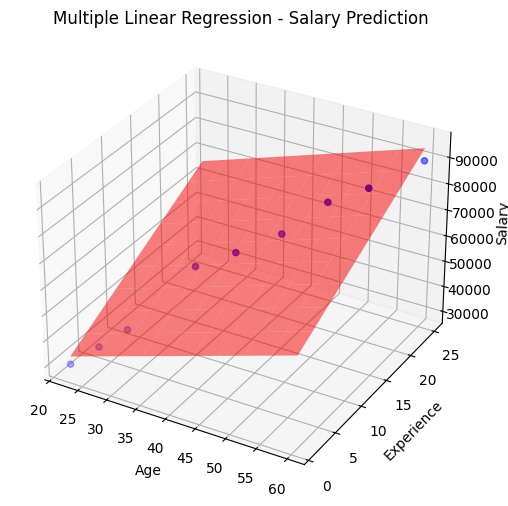

In [6]:
import numpy as np
# Plot the data and the regression plane
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Experience'], df['Salary'], color='blue', label='Data Points')

# Create a mesh grid for the plot
age_range = np.linspace(df['Age'].min(), df['Age'].max(), 10)
experience_range = np.linspace(df['Experience'].min(), df['Experience'].max(), 10)
age_grid, experience_grid = np.meshgrid(age_range, experience_range)
salary_grid = model.intercept_ + model.coef_[0] * age_grid + model.coef_[1] * experience_grid

# Plot the regression plane
ax.plot_surface(age_grid, experience_grid, salary_grid, color='red', alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Experience')
ax.set_zlabel('Salary')
ax.set_title('Multiple Linear Regression - Salary Prediction')
plt.show()